## Import the Necessary Libraries :

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('house_price_regression_dataset.csv')
data

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [4]:
data.shape

(1000, 8)

In [5]:
data.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [12]:
data.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [14]:
d = ['Year_Built']
result = data.pop('House_Price')
data = data.drop(columns=d)

In [16]:
# Split the dataset into training and testing data
training_data, testing_data, training_result, testing_result = train_test_split(data, result, test_size=0.15, random_state=100)

In [18]:
# Fit on the training data and transform both training and testing data
scaler = StandardScaler()
training_data = scaler.fit_transform(training_data)
testing_data = scaler.transform(testing_data)

In [20]:
training_data

array([[ 1.23455407,  1.42663321,  0.02591401,  0.64185854,  1.20353069,
        -1.61029363],
       [ 0.43716215,  0.72528085,  0.02591401, -0.64785669, -1.26153217,
        -1.26438775],
       [ 0.29813791, -1.37877623,  0.02591401,  0.13835311, -0.02900074,
         1.50285933],
       ...,
       [ 0.73678337, -0.67742387, -1.1978032 , -0.90017493, -1.26153217,
         0.11923579],
       [-0.99143179,  0.02392849,  1.24963122,  1.6462475 , -0.02900074,
        -0.91848186],
       [-0.84361866,  1.42663321,  0.02591401, -0.41787336, -1.26153217,
        -1.61029363]])

In [22]:
testing_data

array([[-0.84921159, -1.37877623,  1.24963122, -0.46879222, -1.26153217,
        -1.26438775],
       [ 0.83905407, -0.67742387,  1.24963122, -1.19772051,  1.20353069,
        -0.22667009],
       [ 1.72753084,  0.72528085,  1.24963122, -1.50866731, -0.02900074,
         0.11923579],
       [-0.13012068,  0.02392849, -1.1978032 ,  1.40270802, -1.26153217,
        -0.22667009],
       [-1.66418128, -0.67742387,  1.24963122,  0.22148269, -1.26153217,
         0.81104756],
       [ 0.79590862, -0.67742387,  0.02591401,  0.92340608,  1.20353069,
        -0.57257598],
       [ 1.46066822, -0.67742387,  1.24963122, -1.3729132 , -1.26153217,
        -0.91848186],
       [-1.63861361,  0.72528085, -1.1978032 , -0.30191962,  1.20353069,
        -1.26438775],
       [ 1.49502478,  0.72528085,  1.24963122, -0.60108603, -0.02900074,
        -1.61029363],
       [-0.64387118, -0.67742387,  0.02591401, -0.50615263, -0.02900074,
         0.81104756],
       [ 1.71714397, -1.37877623, -1.1978032 , -0.

## Linear Regression Model

In [25]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the Linear Regression model on the training data 
linear_model.fit(training_data, training_result)

# Predict the labels for the testing data
linear_pred = linear_model.predict(testing_data)

# Calculate the R² score & Mean Squared Error (MSE) for the testing dataset
linear_r2 = r2_score(testing_result, linear_pred)
linear_mse = mean_squared_error(testing_result, linear_pred)

# Print the performance metrics of the Linear Regression model
print("R^2 Score: ", linear_r2)
print("Mean Squared Error: ", linear_mse)

R^2 Score:  0.9924109209086748
Mean Squared Error:  503748743.0858769


In [27]:
testing_result.shape
testing_result_matrix = testing_result.values.reshape(-1,1)
testing_result_matrix.shape

(150, 1)

In [29]:
comparison_df = pd.DataFrame({'Actual': testing_result_matrix.flatten(), 'Predicted': linear_pred.flatten()})

comparison_df.head(10)

,Actual,Predicted
0,3.817380e+05,3.788652e+05
1,8.243517e+05,8.065036e+05
2,1.043830e+06,1.037700e+06
3,5.729414e+05,5.981227e+05
4,2.368654e+05,1.983867e+05
5,8.161738e+05,8.274720e+05
6,9.151042e+05,9.484175e+05
7,2.392346e+05,2.105815e+05
8,9.653048e+05,9.965759e+05
9,4.488795e+05,4.369356e+05


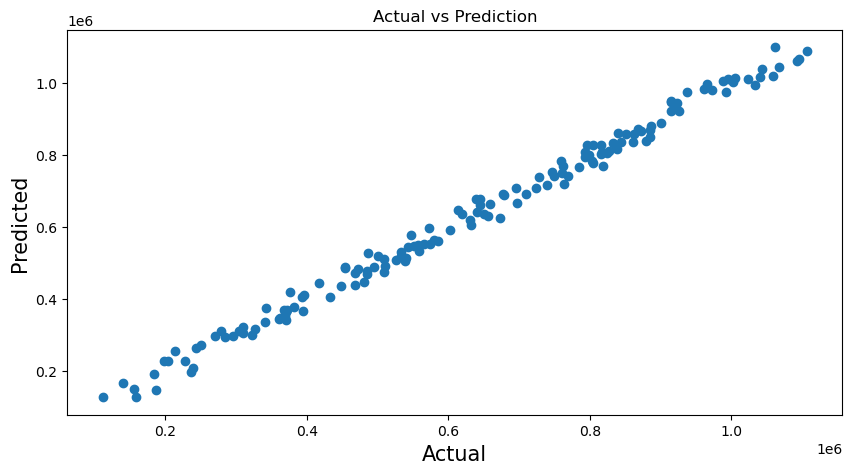

In [31]:
plt.figure(figsize = (10, 5))

# Scatter plot of actual versus predicted values
plt.scatter(testing_result, linear_pred)

# Set the title and labels for the plot
plt.title('Actual vs Prediction')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.show()

## K-Nearest Neighbors (KNN) Model

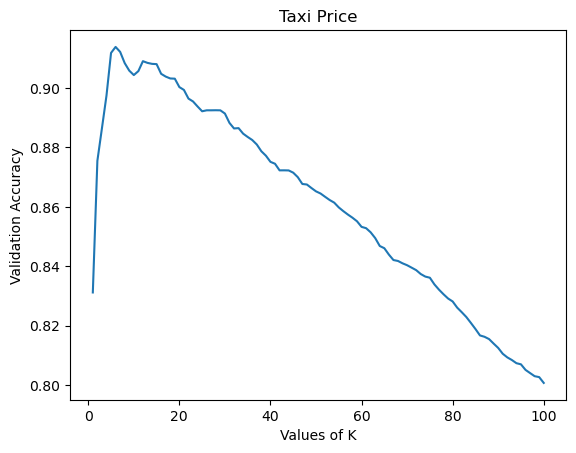

In [34]:
ks= [i for i in range(1,101)]
k_values= list()
for k in range(1,101):
  knn= KNeighborsRegressor(n_neighbors=k)
  knn.fit(training_data, training_result)
  k_values.append(knn.score(testing_data, testing_result))

# PLotting the graph
plt.plot(ks, k_values)
plt.xlabel("Values of K")
plt.ylabel("Validation Accuracy")
plt.title("Taxi Price")
plt.show()

In [48]:
# Initialize the K-Nearest Neighbors (KNN) Regressor with  neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the KNN model on the training data and labels
knn_model.fit(training_data, training_result)

# Predict the labels for the testing data
knn_pred = knn_model.predict(testing_data)

# Calculate the R² score & Mean Squared Error (MSE) for the testing dataset
knn_r2 = r2_score(testing_result, knn_pred)
knn_mse = mean_squared_error(testing_result, knn_pred)

# Print the performance metrics of the KNN model
print("R^2 Score: ", knn_r2)
print("Mean Squared Error: ", knn_mse)

R^2 Score:  0.9118359043320788
Mean Squared Error:  5852166230.390775


## Decision Tree Model

In [51]:
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_leaf=5)

# Train the model
dt_model.fit(training_data, training_result)

# Predict on the testing data
dt_pred = dt_model.predict(testing_data)

# Calculate the R² score & Mean Squared Error (MSE) for the testing dataset
dt_r2 = r2_score(testing_result, dt_pred)
dt_mse = mean_squared_error(testing_result, dt_pred)

# Print the performance metrics of the KNN model
print("R^2 Score: ", dt_r2)
print("Mean Squared Error: ", dt_mse)

R^2 Score:  0.9867147226465373
Mean Squared Error:  881851630.1937017


## Random Forest

In [54]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(training_data, training_result)

# Make predictions
rf_pred = rf_model.predict(testing_data)

# Calculate the R² score & Mean Squared Error (MSE) for the testing dataset
rf_r2 = r2_score(testing_result, rf_pred)
rf_mse = mean_squared_error(testing_result, rf_pred)

# Print the performance metrics of the Rnadom Forest model
print("R^2 Score: ", rf_r2)
print("Mean Squared Error: ", rf_mse)

R^2 Score:  0.9898287554490548
Mean Squared Error:  675148011.5702658


## Gradient Boosting Regressor

In [57]:
# Initialize and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(training_data, training_result)

# Make predictions
gb_pred = gb_model.predict(testing_data)

# Calculate the R² score & Mean Squared Error (MSE) for the testing dataset
gb_r2 = r2_score(testing_result, gb_pred)
gb_mse = mean_squared_error(testing_result, gb_pred)

# Print the performance metrics of the Rnadom Forest model
print("R^2 Score: ", gb_r2)
print("Mean Squared Error: ", gb_mse)

R^2 Score:  0.9914417748050244
Mean Squared Error:  568078831.84968


## Adaboost Regressor

In [64]:
# Initialize and train the Adaboost Regressor model
adb_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
adb_model.fit(training_data, training_result)

# Make predictions
adb_pred = adb_model.predict(testing_data)

# Calculate the R² score & Mean Squared Error (MSE) for the testing dataset
adb_r2 = r2_score(testing_result, adb_pred)
adb_mse = mean_squared_error(testing_result, adb_pred)

# Print the performance metrics of the Rnadom Forest model
print("R^2 Score: ", adb_r2)
print("Mean Squared Error: ", adb_mse)

R^2 Score:  0.9803664422527786
Mean Squared Error:  1303238498.1693063


## XGBoost Regressor

In [67]:
# Initialize and train the XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(training_data, training_result)

# Make predictions
xgb_pred = xgb_model.predict(testing_data)

# Calculate the R² score & Mean Squared Error (MSE) for the testing dataset
xgb_r2 = r2_score(testing_result, xgb_pred)
xgb_mse = mean_squared_error(testing_result, xgb_pred)

# Print the performance metrics of the Rnadom Forest model
print("R^2 Score: ", xgb_r2)
print("Mean Squared Error: ", xgb_mse)

R^2 Score:  0.9908592508370612
Mean Squared Error:  606745673.1287824
